In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import pandas as pd
import sys
import tensorflow as tf
import cv2
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
sys.path.append('../')
tf.random.set_seed(42)

from helpers import *
from glash_v2 import glash_discriminator, glash_generator, Glash

2022-02-09 15:20:11.798766: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def bivariate_normal_pdf(domain, mean, variance):
    
    x = np.arange(-domain+mean, domain+mean, variance)
    y = np.arange(-domain+mean, domain+mean, variance)
    #mean2 = (1, 1)
    #cov = [[1, 0], [0, 1]] # Should be symmetric
    #bidim = np.random.multivariate_normal(mean2, cov, 500).astype('float32')
    #x = bidim[:, :1]
    #y = bidim[:, 1:2]
    
    x, y = np.meshgrid(x, y)
    r = np.sqrt(x**2 + y**2)
    z = ((1. / np.sqrt(2 * np.pi)) * np.exp(-.5*r**2))
    
    return x+mean, y+mean, z

def plt_plot_bivariate(x, y, z):
    
    fig = plt.figure(figsize=(12, 6))
    ax = fig.gca(projection='3d')
    ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=True)
    
    plt.show()

/tmp/ipykernel_10754/476423457.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


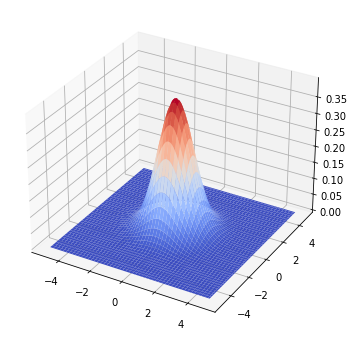

In [3]:
x, y, z = bivariate_normal_pdf(5, 0, 0.1)
plt_plot_bivariate(x, y, z)

In [4]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([6, 7, 8, 9, 10])

c, d = np.meshgrid(a, b)
c

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])

/tmp/ipykernel_10754/2084472174.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


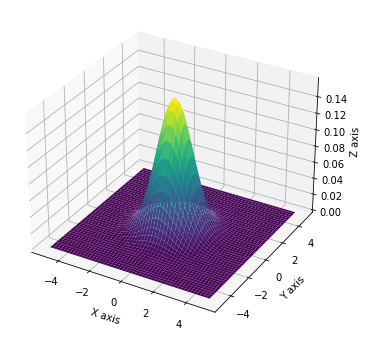

In [7]:
# Parameters to set
mu_x = 0
variance_x = 1

mu_y = 0
variance_y = 1

# Create grid and multivariate normal
x = np.linspace(-5, 5, 500) # np.random.normal(0, 1, 500)
y = np.linspace(-5, 5, 500) #np.random.normal(0, 1, 500)
X, Y = np.meshgrid(x, y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

rv = multivariate_normal([mu_x, mu_y, mu_z], [[variance_x, 0, 0], [0, variance_y, 0], [0, 0, variance_z]])

# Make a 3D plot
fig = plt.figure(figsize=(12, 6))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [6]:
rv.pdf(pos).shape
X.shape

(500, 500)